In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
import matplotlib.pyplot as plt # visualization library
from sklearn.model_selection import GridSearchCV
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [52]:
data=pd.read_csv("Expander_data.csv")

In [53]:
data.head()

,Timestamp,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
0,1/4/2020 21:20,596.100853,-229.436683,7925.800487,2999.411045,6.0,226.044931,-227.614448,NaN
1,1/4/2020 21:20,596.838217,-230.453708,8085.917724,2989.706617,6.0,217.150974,-228.668636,NaN
2,1/4/2020 21:20,596.468895,-229.545356,7902.175243,3006.331679,6.0,226.054086,-227.755324,NaN
3,1/4/2020 21:20,603.568271,-230.309438,7991.808959,3010.487486,6.0,226.016182,-228.489113,NaN
4,1/4/2020 21:21,595.407372,-229.767969,7871.560747,2986.665518,6.0,227.769383,-227.971795,NaN


In [54]:
data.describe()

,Suction Pressure (psig),Suction Temperature (F),Total Flow (gpm),Speed (rpm),By-pass Valve Position (%),Discharge Pressure (psig),Discharge Temperature (F),Run Status
count,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,296450.000000,0.0
mean,590.541350,-231.564934,8119.917777,2955.416695,2.005667,186.991087,-229.764934,NaN
std,23.216552,3.574107,398.049531,54.201467,2.488568,56.205183,3.574136,NaN
min,552.420048,-238.594971,7056.004500,2835.750571,-0.200000,69.983885,-236.816223,NaN
25%,572.757269,-234.171427,7916.322054,2906.336126,0.000000,143.468467,-232.371760,NaN
50%,586.491792,-230.922352,8144.161813,2961.788792,0.000000,183.270451,-229.122946,NaN
75%,605.986608,-229.585168,8388.610374,3000.863611,4.000000,223.580205,-227.785796,NaN
max,649.217417,-223.440125,8975.986378,3090.367995,8.026667,324.411576,-221.617102,NaN


In [55]:
data.dtypes

Timestamp                      object
Suction Pressure (psig)       float64
Suction Temperature (F)       float64
Total Flow (gpm)              float64
Speed (rpm)                   float64
By-pass Valve Position (%)    float64
Discharge Pressure (psig)     float64
Discharge Temperature (F)     float64
Run Status                    float64
dtype: object

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296450 entries, 0 to 296449
Data columns (total 9 columns):
Timestamp                     296450 non-null object
Suction Pressure (psig)       296450 non-null float64
Suction Temperature (F)       296450 non-null float64
Total Flow (gpm)              296450 non-null float64
Speed (rpm)                   296450 non-null float64
By-pass Valve Position (%)    296450 non-null float64
Discharge Pressure (psig)     296450 non-null float64
Discharge Temperature (F)     296450 non-null float64
Run Status                    0 non-null float64
dtypes: float64(8), object(1)
memory usage: 20.4+ MB


In [57]:
data=data.drop("Timestamp",axis=1)

In [58]:
data.isnull().sum()

Suction Pressure (psig)            0
Suction Temperature (F)            0
Total Flow (gpm)                   0
Speed (rpm)                        0
By-pass Valve Position (%)         0
Discharge Pressure (psig)          0
Discharge Temperature (F)          0
Run Status                    296450
dtype: int64

In [59]:
y=data["Discharge Pressure (psig)"]

In [60]:
#deleting the column having missing values
data=data.drop("Run Status",axis=1)
data=data.drop("Discharge Pressure (psig)",axis=1)
data["Discharge pressure"]=y

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-1],data['Discharge pressure'],test_size=0.3)

In [64]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test,lr_pred))
print("RMSE :",rmse_lr)


RMSE : 2.4610309080889667


In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500,max_depth=5, min_samples_split=2, min_samples_leaf=7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
regressor.feature_importances_

Root Mean Squared Error: 5.770458472053132


array([0.66711949, 0.12536135, 0.11314247, 0.00108422, 0.03859455,
       0.05469792])

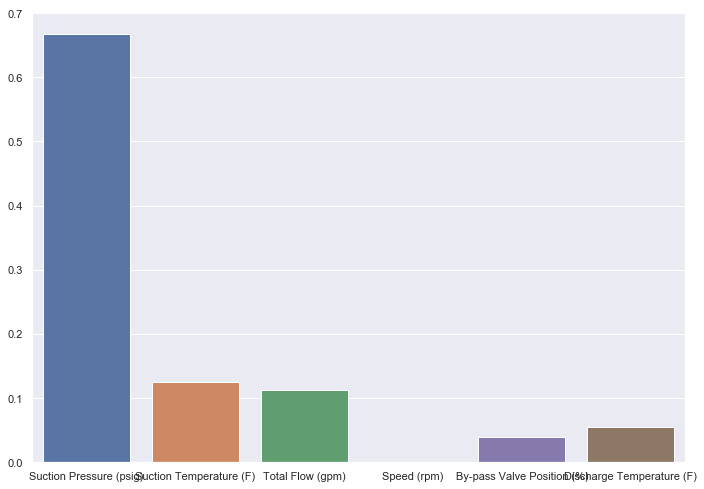

In [66]:
names=list(data)
names=names[0:-1]
sns.barplot(x=names,y=regressor.feature_importances_)

In [67]:
data=data.drop("By-pass Valve Position (%)",axis=1)

In [68]:
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-1],data['Discharge pressure'],test_size=0.3)

Root Mean Squared Error: 6.2507005763872465


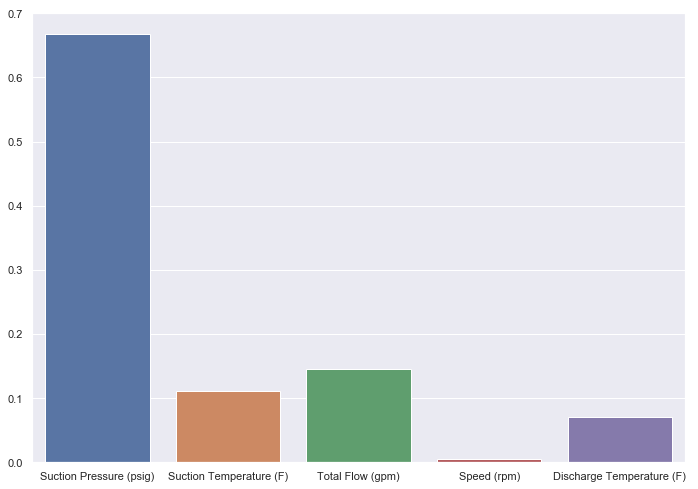

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50,max_depth=5, min_samples_split=2, min_samples_leaf=7)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
names=list(data)
names=names[0:-1]
sns.barplot(x=names,y=regressor.feature_importances_)

In [70]:
import xgboost as xgb

In [79]:
X, y = data.iloc[:,0:-1],data.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,max_depth =11,alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

C:\Users\vikaa\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\vikaa\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:10:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 72.577102
